import necessary modules

In [1]:
import vcs # For plots
import vcsaddons # module containing pcoords
import cdms2 # for data
import glob # to list files in directories
import pcmdi_metrics # for special json loader class

## Work around to visualize plot in Jupyter Notebook
This class allow use to use vcsaddons plots 

In [2]:
import tempfile
import base64
class VCSAddonsNotebook(object):
    def __init__(self, x):
        self.x = x
    def _repr_png_(self):
        fnm = tempfile.mktemp()+".png"
        x.png(fnm)
        encoded = base64.b64encode(open(fnm, "rb").read())
        return encoded
    def __call__(self):
        return self
    

# Sample Data
These files are in the test directory of pcmdi_metrics repo at:
http://github.com/PCMDI/pcmdi_metrics.git

In [3]:
# Prepare list of json files

# Location on your computer
json_pth = "/git/pcmdi_metrics/test/graphics"
# Geenrate list ofjson files
json_files = glob.glob(
            os.path.join(
                json_pth,
                "json",
                "v2.0",
                "*.json"))
json_files += glob.glob(
            os.path.join(
                json_pth,
                "json",
                "v1.0",
                "*.json"))
# Read them in via pmp special json class
J = pcmdi_metrics.pcmdi.io.JSONs(json_files)

# Retrieve data we need for plot
# Annual mean RMS (XYT dimensions)
# All models and all variables
rms_xyt = J(statistic=["rms_xyt"],season=["ann"],region="global")(squeeze=1)

Let's take a look at the array generated
Note the axis are strings of varialbes used and models
The order of the axes is the order on the plot

In [4]:
rms_xyt.info()

*** Description of Slab pmp ***
id: pmp
shape: (14, 17)
filename: 
missing_value: 1e+20
comments: 
grid_name: N/A
grid_type: N/A
time_statistic: 
long_name: 
units: 
tileIndex: None
No grid present.
** Dimension 1 **
   id: variable
   Length: 14
   First:  pr
   Last:   zg-500
   Other axis attributes:
      realtopology: linear
   Python id:  0x7f7cc019e4d0
** Dimension 2 **
   id: model
   Length: 17
   First:  0071-0100
   Last:   bcc-csm1-1-m
   Other axis attributes:
      realtopology: linear
   Python id:  0x7f7cc019eb50
*** End of description for pmp ***


In [5]:
# Ok now let's create a VCS pcoord graphic method

# initialize a canvas
x=vcs.init(geometry=(1200,600),bg=True)
import vcsaddons
gm = vcsaddons.createparallelcoordinates(x=x)

# Preparing the plot
## Data
'id' is used for variable in plot the JSON class returns var as "pmp", here "RMS" is more appropriate

'title' is used to draw the plot title (location/font controlled by template)

## Template
The template section prepares where data will be rendered on plot, and the fonts used

fonts are controlled via textorientation and texttable VCS primary objects

Here we need to angle a bit the xlabels (45 degrees)

We also want to turn off the boxes around the legend and the data area.

In [14]:
# Prepare the graphics
# Set variable name
rms_xyt.id = "RMS"
# Set units of each variables on axis
# This is a trick to have units listed on plot
rms_xyt.getAxis(-2).units = ["mm/day","mm/day","hPa","W/m2","W/m2","W/m2", "K","K","K","m/s","m/s","m/s","m/s","m"]
# Sets title on the variable
rms_xyt.title = "Annual Mean Error"

# Preprare the canvas areas
t = vcs.createtemplate()
# Create a text orientation object for xlabels
to=x.createtextorientation()
to.angle=-45
to.halign="right"
# Tell template to use this orientation for x labels
t.xlabel1.textorientation = to.name

# Define area where plot will be drawn in x direction
t.reset('x',0.05,0.9,t.data.x1,t.data.x2)
ln = vcs.createline()

# Turn off box around legend
ln.color = [[0,0,0,0]]
t.legend.line = ln
# turn off box around data area
t.box1.priority=0

# Define box where legend will be drawn
t.legend.x1 = .91
t.legend.x2 = .99
# use x/y of data drawn for legend height
t.legend.y1 = t.data.y1
t.legend.y2 = t.data.y2

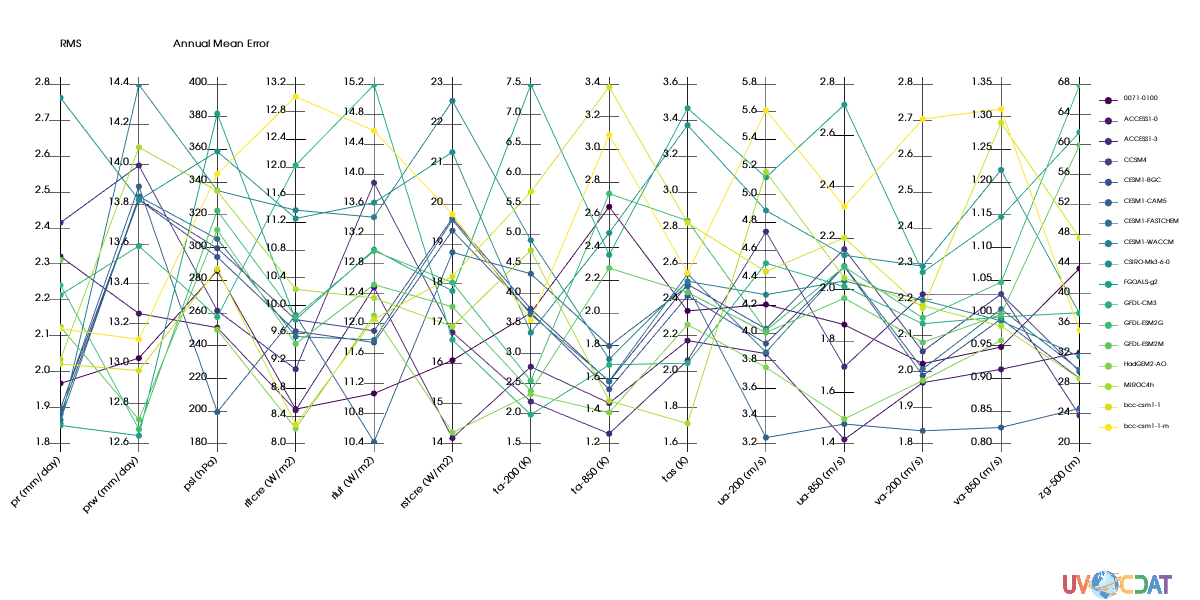

In [7]:
# Plot with default values of graphic method
# Bug vcsaddons need to return a display
# as a result it does not show up in notebook
x.clear()
show = VCSAddonsNotebook(x)
gm.plot(rms_xyt,template=t,bg=True)
show()

# Control various aspects of the graphic method
We want the first two model to be 'blue' and 'red' and a bit thicker

All other plots will be 'grey' and 'dashed'

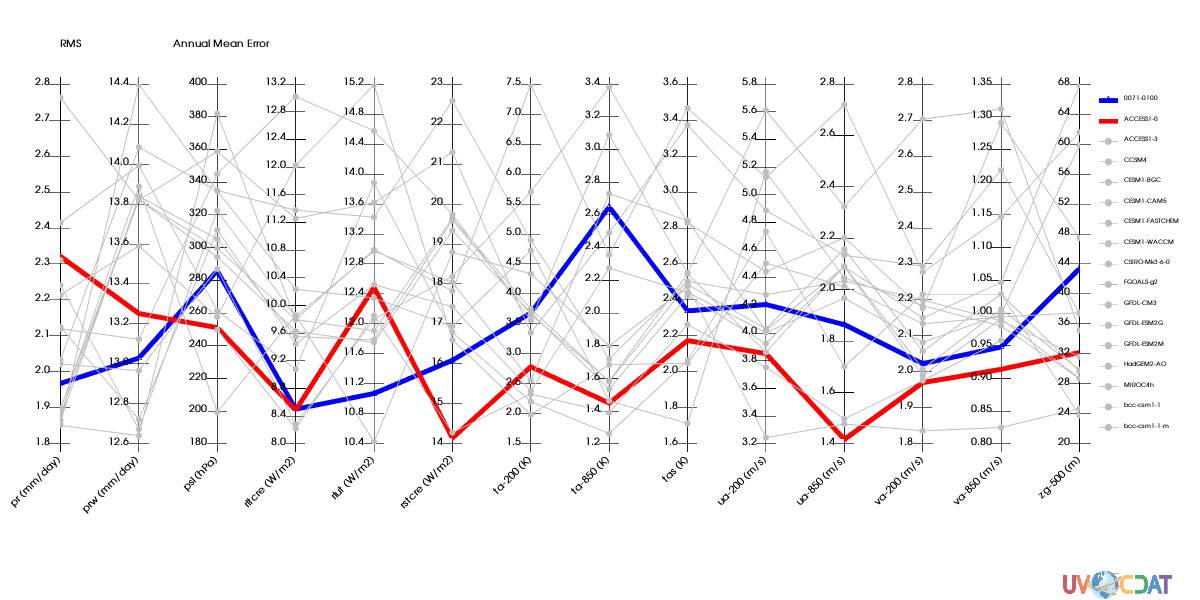

In [12]:
x.clear()
gm.linecolors = ["blue","red","grey"]
gm.linestyles=["solid","solid","dot"]
gm.linewidths=[5.,5.,1.]
gm.markercolors = ["blue","red","grey"]
gm.markertypes=["triangle_up","star","dot"]
gm.markersizes=[7,5,2]
gm.plot(rms_xyt,template=t,bg=True)
show()

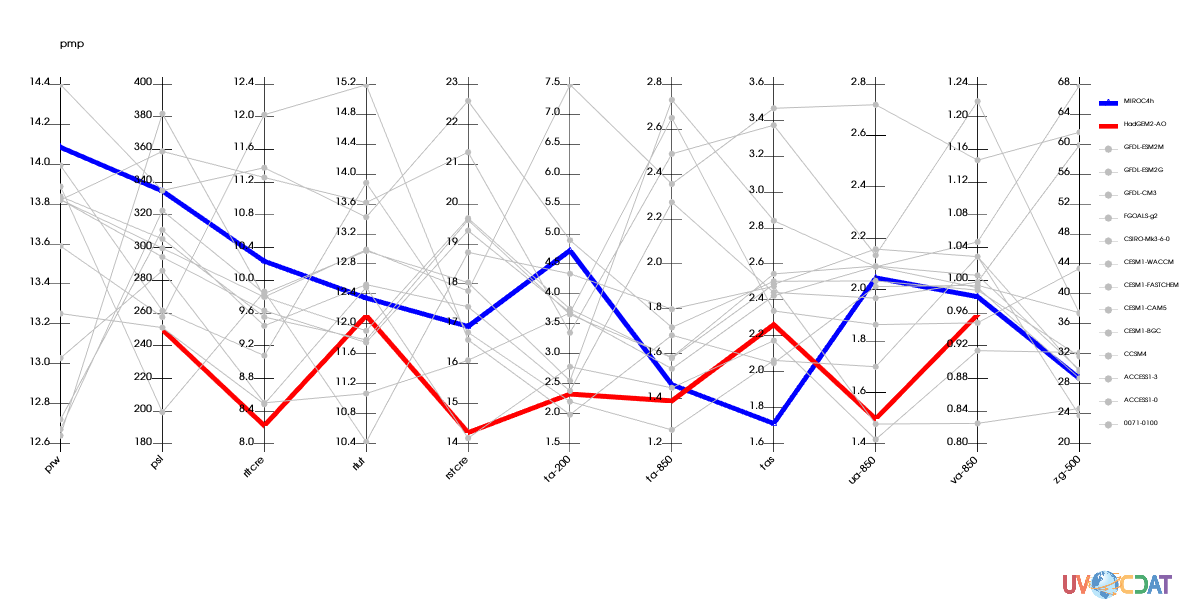

In [13]:
# change order and number of models and variables
axes = rms_xyt.getAxisList()
models = ['MIROC4h', 'HadGEM2-AO', 'GFDL-ESM2M',
 'GFDL-ESM2G', 'GFDL-CM3', 'FGOALS-g2', 'CSIRO-Mk3-6-0', 'CESM1-WACCM',
 'CESM1-FASTCHEM', 'CESM1-CAM5', 'CESM1-BGC', 'CCSM4', 'ACCESS1-3', 'ACCESS1-0',
 '0071-0100'] # invert them
variables = ['prw', 'psl', 'rltcre', 'rlut', 'rstcre', 'ta-200', 'ta-850', 'tas',
 'ua-850', 'va-850', 'zg-500']
rms_xyt = J(statistic=["rms_xyt"],season=["ann"],region="global",model=models,variable=variables)(squeeze=1)
x.clear()
gm.plot(rms_xyt,template=t,bg=True)
show()